# ARIMA MODEL 
#### Split train-test-validate: 65-25-10

##### Step 1. Import modules and load dataset

In [1]:
import numpy as np
import pandas as pd
import math
import statistics as st
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
df = pd.read_csv('HPG Historical Data.csv',delimiter=";")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,30.850,31.200,31.200,30.650,26.96M,"-0,48%"
1,02/29/2024,31.000,30.750,31.150,30.500,33.58M,"1,31%"
2,02/28/2024,30.600,30.400,30.950,30.150,35.20M,"0,82%"
3,02/27/2024,30.350,28.900,30.450,28.800,86.84M,"5,38%"
4,02/26/2024,28.800,28.400,28.800,28.300,19.22M,"1,05%"
...,...,...,...,...,...,...,...
1247,03/07/2019,12.001,12.318,12.335,12.001,12.47M,"-2,57%"
1248,03/06/2019,12.318,12.318,12.388,12.107,9.24M,"-0,14%"
1249,03/05/2019,12.335,12.353,12.529,12.300,15.62M,"-0,85%"
1250,03/04/2019,12.441,12.230,12.441,12.212,13.74M,"3,21%"


In [3]:
# Convert the data types
df['Date'] = pd.to_datetime(df['Date'])

##### Step 2. Selecting attribute 

In [4]:
df = df[['Price']]
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Price
0,30.850
1,31.000
2,30.600
3,30.350
4,28.800
...,...
1247,12.001
1248,12.318
1249,12.335
1250,12.441


##### Step 3. Split the dataset into train, test, validate

In [6]:
# Calculate the number of samples for each set
train_size = int(0.65 * len(df))
test_size = int(0.25 * len(df))
val_size = len(df) - train_size - test_size

# Split data into sets
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Check the size of each set
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))
print("Validate data size:", len(val_data))

Train data size: 813
Test data size: 313
Validate data size: 126


##### Step 4. Process of training the model

In [8]:
!pip install pmdarima

In [7]:
# Process of Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1556.631, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1554.812, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1555.543, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1555.346, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1553.209, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1554.419, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.033 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
# Process of Testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [9]:
# Process of Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(n_periods=len(y_val))

##### Step 5. Evaluate the accuracy of validation and test sets

In [10]:
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 8.68437909706775
Testing RMSE: 8.058088504022411


In [12]:
# MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape_validate = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
print('Validation MAPE:', mape_validate)
print('Testing MAPE:', mape_test)

Validation MAPE: 80.05629017968432
Testing MAPE: 70.95138743694856


In [13]:
# MAE
mae_test = np.mean(np.abs(y_test - y_pred))
mae_val = np.mean(np.abs(y_val - y_pred_val))
print("Validation MAE:", mae_val)
print("Testing MAE:", mae_test)

Validation MAE: 8.65711111111111
Testing MAE: 7.6630287539936095


##### Step 6. Forecasting 

##### a. The next 30 days

In [15]:
# Process of creating an index to predict the next 30 days
last_index = df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Creating an array for the next 30 days
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predicting the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Printing out the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569
 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569
 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569 19.569]


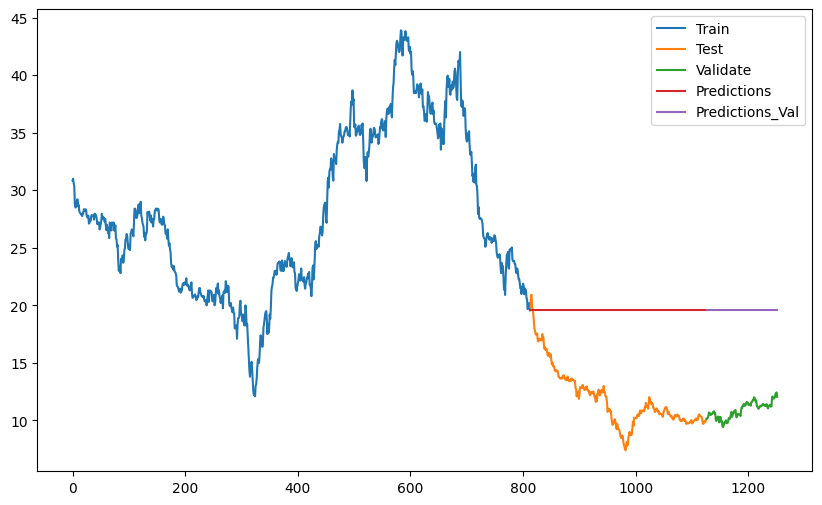

In [16]:
# Plot a graph
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate','Predictions','Predictions_Val'])
plt.show()

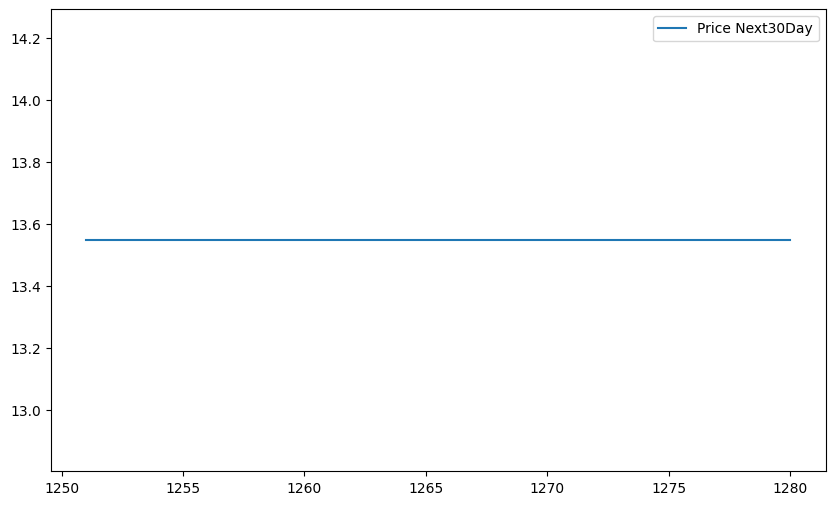

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['Price Next30Day'])
plt.show()

##### b. The next 60 days

In [27]:
# Process of creating an index to predict the next 60 days
last_index = df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Creating an array for the next 60 days
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predicting the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Printing out the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548]


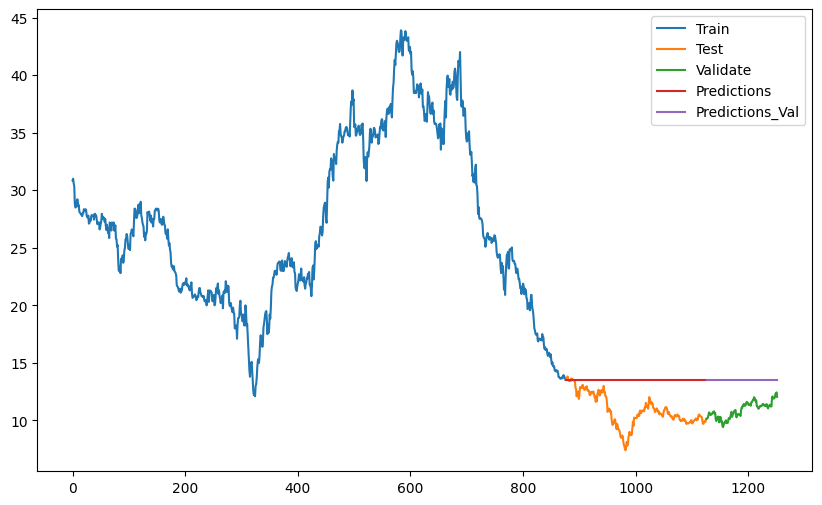

In [28]:
# Plot a graph
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate','Predictions','Predictions_Val'])
plt.show()

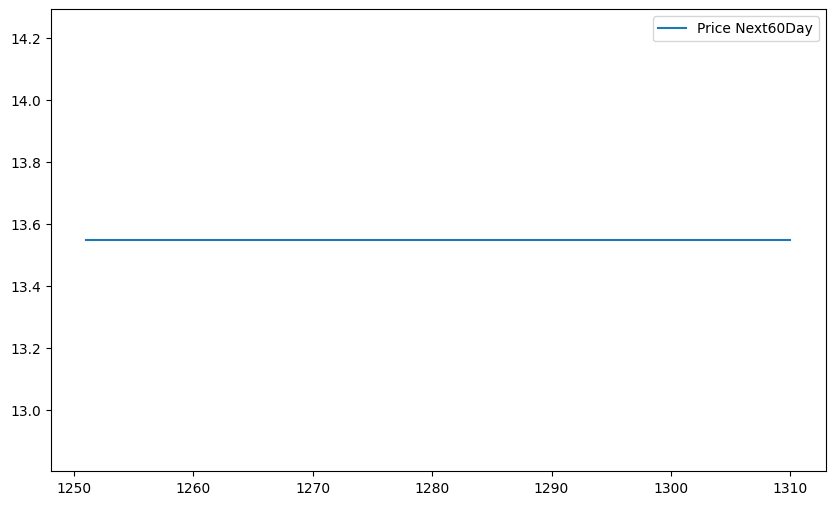

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_60_days)
plt.legend(['Price Next60Day'])
plt.show()

##### c. The next 90 days

In [30]:
# Process of creating an index to predict the next 90 days
last_index = df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Creating an array for the next 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predicting the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Printing out the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548
 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548 13.548]


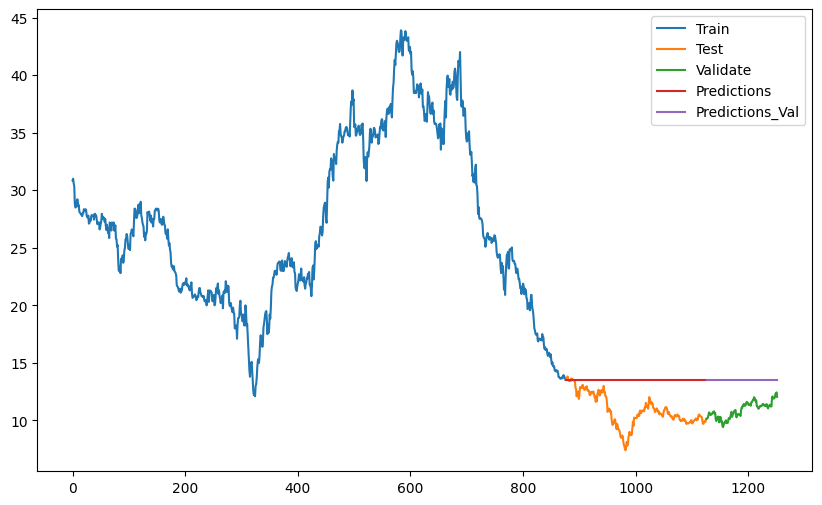

In [31]:
# Plot a graph
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test','Validate','Predictions','Predictions_Val'])
plt.show()

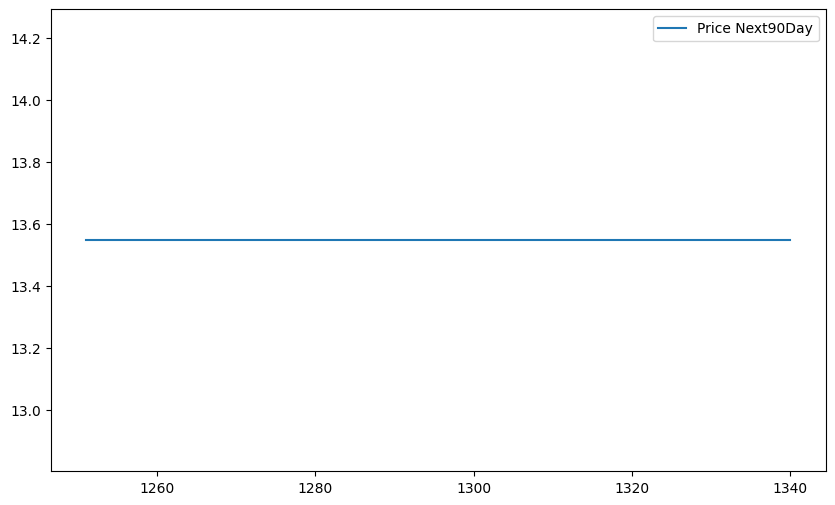

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_90_days)
plt.legend(['Price Next90Day'])
plt.show()